# Importing Libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
import shutil
import nlpaug.augmenter.word as naw
import string
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Load the Traing and testing Data and doing some preprocessing

In [2]:
def Read_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        file_content = file.read()
    return file_content

In [3]:
def text_to_dataframe(file_content):
    # Split the content into lines 
    lines = file_content.split('\n')

    # Initialize empty lists for the data so use it to make an dataframe
    ids = []
    titles = []
    genres = []
    descriptions = []

    # Loop through the lines and split the data, but check if it has enough parts so we know that their is no missing values in it
    for line in lines:
        if line:
            parts = line.split(':::')
            if len(parts) >= 4:
                ids.append(parts[0].strip())
                titles.append(parts[1].strip())
                genres.append(parts[2].strip())
                descriptions.append(parts[3].strip())
            else:
                print(f"Skipping line: {line} - Doesn't contain enough parts")

    # Creating DataFrame from the lists i have made earlier
    my_data = pd.DataFrame({
        'ID': ids,
        'TITLE': titles,
        'GENRE': genres,
        'DESCRIPTION': descriptions
    })
    return my_data

In [4]:
# to apply the augentation, i am Initializing an augmentation object
aug = naw.SynonymAug(aug_p=0.2) 

def augment_text(text):
    augmented_text = aug.augment(text)
    return augmented_text

In [5]:
# Lowercasing
# Removing punctuation
# Tokenization (split text into words)
# Removing stopwords and applying stemming
# Join the words back into a cleaned text

In [6]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)
    words = text.split()
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    stemmer = SnowballStemmer("english")
    words = [stemmer.stem(word) for word in words]
    cleaned_text = " ".join(words)
    return cleaned_text

In [7]:
def concatinate_two_files():
    shutil.copyfile(file1_path, output_file_path)
    with open(output_file_path, 'ab') as output_file:
        with open(file2_path, 'rb') as file2:
            shutil.copyfileobj(file2, output_file)


In [8]:
traing_data_path = 'datasets/Genre Classification Dataset/train_data.txt'
testing_file_path = 'datasets/Genre Classification Dataset/test_data_solution.txt'
output_file_path = 'Genre Classification Dataset.txt'
# Concatinating train_data and test_data_solution and save the result in output_file if needed

In [9]:
# reading the content of the both files
training_file_content = Read_file(traing_data_path)
testing_file_content = Read_file(testing_file_path)

In [10]:
# converting the text we have read from the data to the dataframe for furthur use
traning_df =  text_to_dataframe(training_file_content)
testing_df = text_to_dataframe(testing_file_content)

In [11]:
# applying preproceessing on the training data
traning_df['TITLE'] = traning_df['TITLE'].apply(preprocess_text)
traning_df['DESCRIPTION'] = traning_df['DESCRIPTION'].apply(preprocess_text)

In [12]:
# augmented_descriptions_training = [augment_text(description) for description in traning_df['DESCRIPTION']]
# traning_df['DESCRIPTION'] = traning_df['DESCRIPTION'] +" "+ augmented_descriptions_training

In [13]:
# applying preproceessing on the testing data
testing_df['TITLE'] = testing_df['TITLE'].apply(preprocess_text)
testing_df['DESCRIPTION'] = testing_df['DESCRIPTION'].apply(preprocess_text)

In [14]:
# augmented_descriptions_testing = [augment_text(description) for description in testing_df['DESCRIPTION']]
# testing_df['DESCRIPTION'] = testing_df['DESCRIPTION'] +" "+ augmented_descriptions_testing

In [15]:
# Encoding the genre of the both the testing and the training data labels into numbers form
label_encoder = LabelEncoder()
traning_df['GENRE'] = label_encoder.fit_transform(traning_df['GENRE'])
testing_df['GENRE'] = label_encoder.fit_transform(testing_df['GENRE'])

In [16]:
# X and Y seprately for testing and training 
X_training = traning_df[['TITLE', 'DESCRIPTION']]
Y_training = traning_df[['GENRE']]

In [17]:
X_testing = testing_df[['TITLE', 'DESCRIPTION']]
Y_testing = testing_df[['GENRE']]

In [18]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_training = tfidf_vectorizer.fit_transform(X_training['TITLE'] + " " + X_training['DESCRIPTION'])
Y_training = Y_training['GENRE']

In [20]:
# Oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
# Undersampling
random_undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
# Fit and transform the training data
X_train_resampled_oversmapled, Y_train_resampled_oversmapled = smote.fit_resample(X_training, Y_training)
X_train_resampled_Undersampled, Y_train_resampled_Undersampled = random_undersampler.fit_resample(X_training, Y_training)

In [21]:
X_testing = tfidf_vectorizer.transform(X_testing['TITLE'] + " " + X_testing['DESCRIPTION'])
Y_testing = Y_testing['GENRE']

# Using Naive Baise

In [22]:
# Training a Naive Bayes classifier on training dataset
naive_bayes = MultinomialNB()
naive_bayes.fit(X_training, Y_training)

MultinomialNB()

In [23]:
# after oversampling the minority class
naive_bayes_oversampled = MultinomialNB()
naive_bayes_oversampled.fit(X_train_resampled_oversmapled, Y_train_resampled_oversmapled)

MultinomialNB()

In [24]:
# after undersample the majority class
naive_bayes_undersampled = MultinomialNB()
naive_bayes_undersampled.fit(X_train_resampled_Undersampled, Y_train_resampled_Undersampled)

MultinomialNB()

In [25]:
# Make predictions
Y_pred_by_Nb = naive_bayes.predict(X_testing)
Y_pred_by_Nb_oversampled = naive_bayes_oversampled.predict(X_testing)
Y_pred_by_Nb_undersampled = naive_bayes_undersampled.predict(X_testing)

In [26]:
# converting the numbers to text again
Y_testing = testing_df.copy()
Y_testing['GENRE'] = label_encoder.inverse_transform(testing_df['GENRE'])

In [27]:
# Decode the genre labels
Y_testing['GENRE_Pred_NB'] = label_encoder.inverse_transform(Y_pred_by_Nb)
Y_testing['GENRE_Pred_NB_oversampled'] = label_encoder.inverse_transform(Y_pred_by_Nb_oversampled)
Y_testing['GENRE_Pred_NB_undersampled'] = label_encoder.inverse_transform(Y_pred_by_Nb_undersampled)

-------------------------------------Naive Baise------------------------------------------------------
---The Result after training on the training dataset and testing it on the testing dataset------------
------------------------------------------------------------------------------------------------------


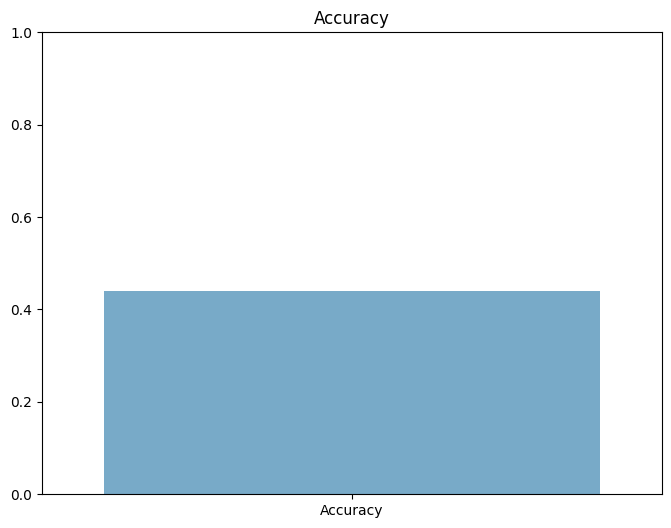

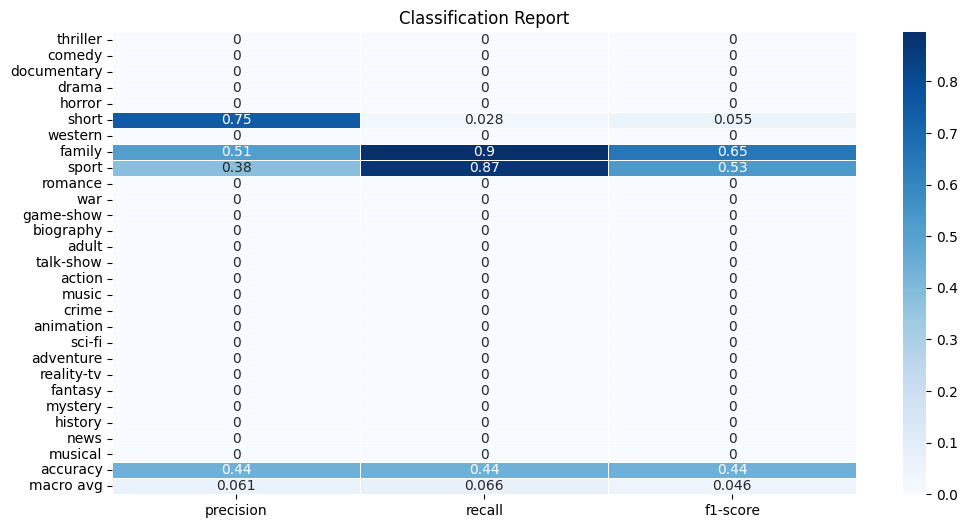

In [28]:
print("-------------------------------------Naive Baise------------------------------------------------------")
print("---The Result after training on the training dataset and testing it on the testing dataset------------")
print("------------------------------------------------------------------------------------------------------")
# Calculate accuracy
accuracy = accuracy_score(Y_testing['GENRE'], Y_testing['GENRE_Pred_NB'])
genre_names = Y_testing['GENRE'].unique()
# Generate a classification report
report = classification_report(Y_testing['GENRE'], Y_testing['GENRE_Pred_NB'], target_names=genre_names, output_dict=True,zero_division=0)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()
# Plot the accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x=['Accuracy'], y=[accuracy], palette="Blues")
plt.title("Accuracy")
plt.ylim(0, 1.0)  # Set the y-axis limit to match the accuracy scale
plt.show()

# Plot the classification report
plt.figure(figsize=(12, 6))
sns.heatmap(report_df.iloc[:-1, :3], annot=True, cmap="Blues", linewidths=.5)
plt.title("Classification Report")
plt.show()


-------------------------------------Naive Baise------------------------------------------------------
--The Result after training on the oversampled training dataset and testing it on the testing dataset-
------------------------------------------------------------------------------------------------------


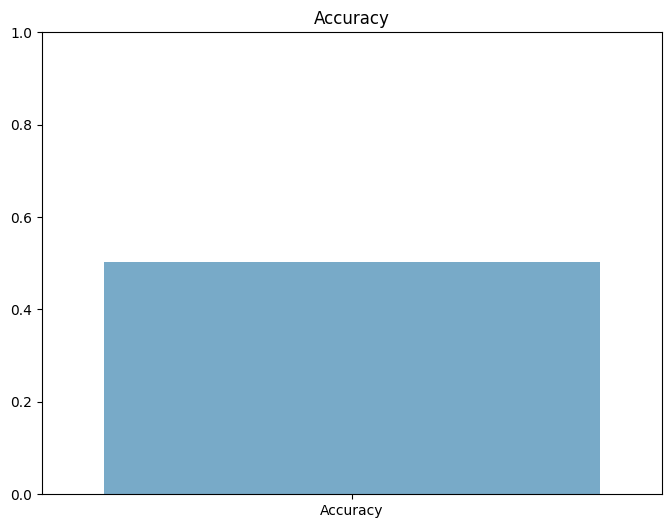

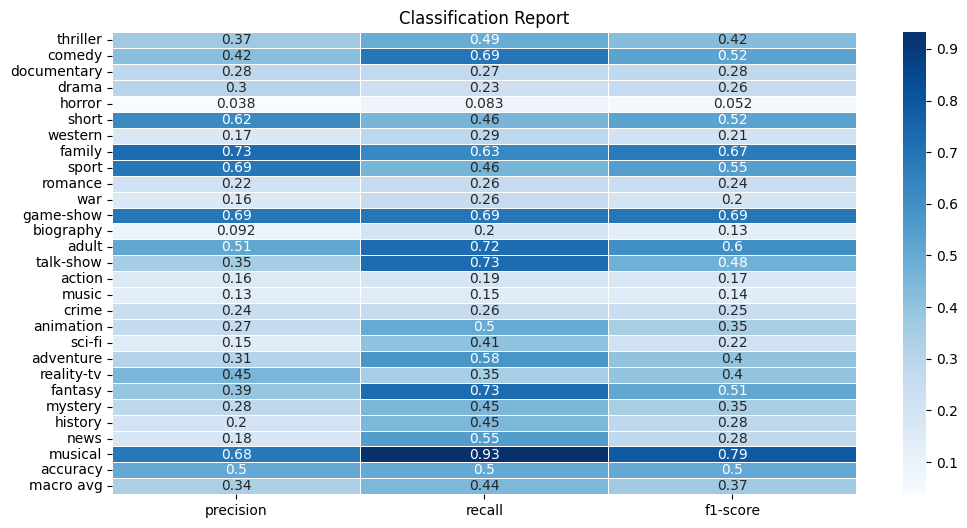

In [29]:
print("-------------------------------------Naive Baise------------------------------------------------------")
print("--The Result after training on the oversampled training dataset and testing it on the testing dataset-")
print("------------------------------------------------------------------------------------------------------")
# Calculate accuracy
accuracy = accuracy_score(Y_testing['GENRE'], Y_testing['GENRE_Pred_NB_oversampled'])
genre_names = Y_testing['GENRE'].unique()
# Generate a classification report
report = classification_report(Y_testing['GENRE'], Y_testing['GENRE_Pred_NB_oversampled'], target_names=genre_names, output_dict=True,zero_division=0)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()
# Plot the accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x=['Accuracy'], y=[accuracy], palette="Blues")
plt.title("Accuracy")
plt.ylim(0, 1.0)  # Set the y-axis limit to match the accuracy scale
plt.show()

# Plot the classification report
plt.figure(figsize=(12, 6))
sns.heatmap(report_df.iloc[:-1, :3], annot=True, cmap="Blues", linewidths=.5)
plt.title("Classification Report")
plt.show()


-------------------------------------Naive Baise------------------------------------------------------
-The Result after training on the undersampled training dataset and testing it on the testing dataset-
------------------------------------------------------------------------------------------------------


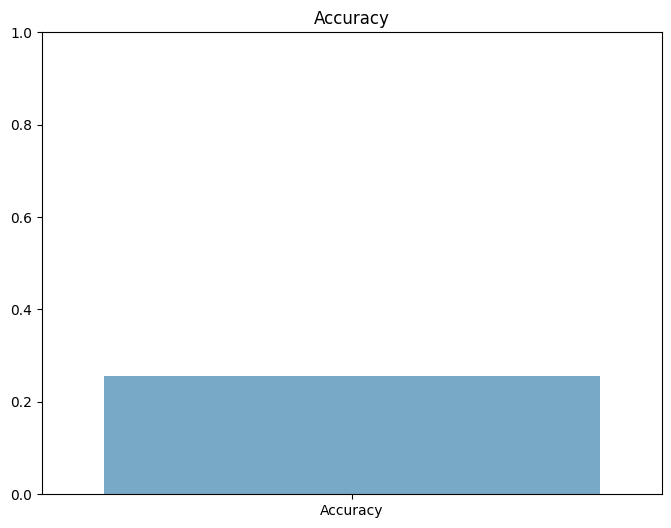

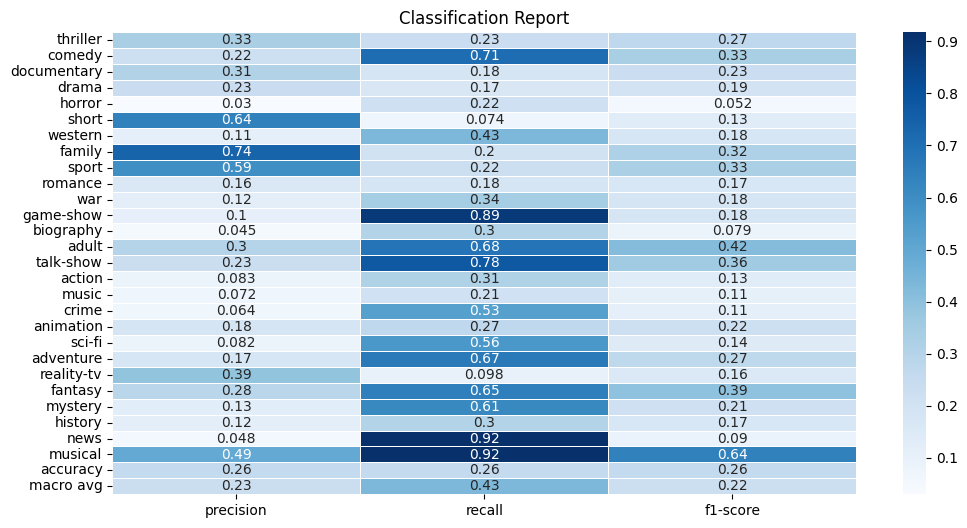

In [30]:
print("-------------------------------------Naive Baise------------------------------------------------------")
print("-The Result after training on the undersampled training dataset and testing it on the testing dataset-")
print("------------------------------------------------------------------------------------------------------")
# Calculate accuracy
accuracy = accuracy_score(Y_testing['GENRE'], Y_testing['GENRE_Pred_NB_undersampled'])
genre_names = Y_testing['GENRE'].unique()
# Generate a classification report
report = classification_report(Y_testing['GENRE'], Y_testing['GENRE_Pred_NB_undersampled'], target_names=genre_names, output_dict=True,zero_division=0)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()
# Plot the accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x=['Accuracy'], y=[accuracy], palette="Blues")
plt.title("Accuracy")
plt.ylim(0, 1.0)  # Set the y-axis limit to match the accuracy scale
plt.show()

# Plot the classification report
plt.figure(figsize=(12, 6))
sns.heatmap(report_df.iloc[:-1, :3], annot=True, cmap="Blues", linewidths=.5)
plt.title("Classification Report")
plt.show()


# Logistic regression

In [31]:
# training the model on the training dataset
logistic_regression_model = LogisticRegression(solver='saga')
logistic_regression_model.fit(X_training, Y_training)

LogisticRegression(solver='saga')

In [32]:
# training the model on the training dataset
logistic_regression_model_oversampled = LogisticRegression(solver='saga')
logistic_regression_model_oversampled.fit(X_train_resampled_oversmapled, Y_train_resampled_oversmapled)

LogisticRegression(solver='saga')

In [33]:
# training the model on the training dataset
logistic_regression_model_undersampled = LogisticRegression(solver='newton-cg')
logistic_regression_model_undersampled.fit(X_train_resampled_Undersampled, Y_train_resampled_Undersampled)

LogisticRegression(solver='newton-cg')

In [34]:
y_pred_on_logistic_regression = logistic_regression_model.predict(X_testing)
y_pred_on_logistic_regression_oversampled = logistic_regression_model_oversampled.predict(X_testing)
y_pred_on_logistic_regression_undersampled = logistic_regression_model_undersampled.predict(X_testing)

In [35]:
# Decode the genre labels
Y_testing['GENRE_Pred_logistic_reg'] = label_encoder.inverse_transform(y_pred_on_logistic_regression)
Y_testing['GENRE_Pred_logistic_reg_oversampled'] = label_encoder.inverse_transform(y_pred_on_logistic_regression_oversampled)
Y_testing['GENRE_Pred_logistic_reg_undersampled'] = label_encoder.inverse_transform(y_pred_on_logistic_regression_undersampled)

In [36]:
Y_testing[['GENRE','GENRE_Pred_NB','GENRE_Pred_NB_oversampled','GENRE_Pred_NB_undersampled','GENRE_Pred_logistic_reg','GENRE_Pred_logistic_reg_oversampled','GENRE_Pred_logistic_reg_undersampled']].to_csv('predicted_genres.csv', index=False)

-------------------------------------Naive Baise------------------------------------------------------
---The Result after training on the training dataset and testing it on the testing dataset------------
------------------------------------------------------------------------------------------------------


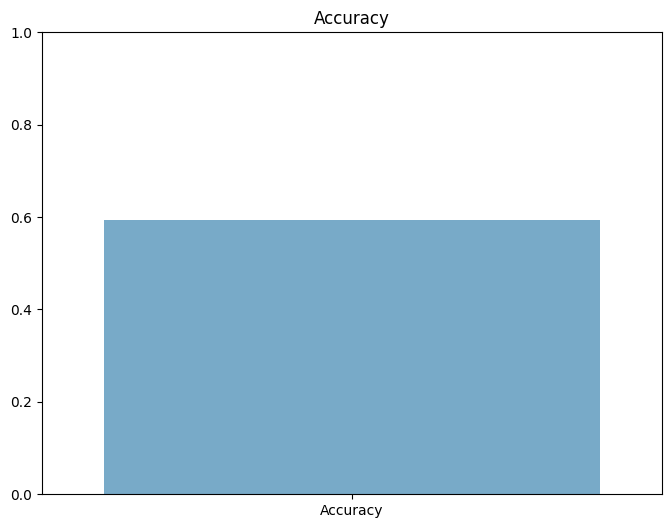

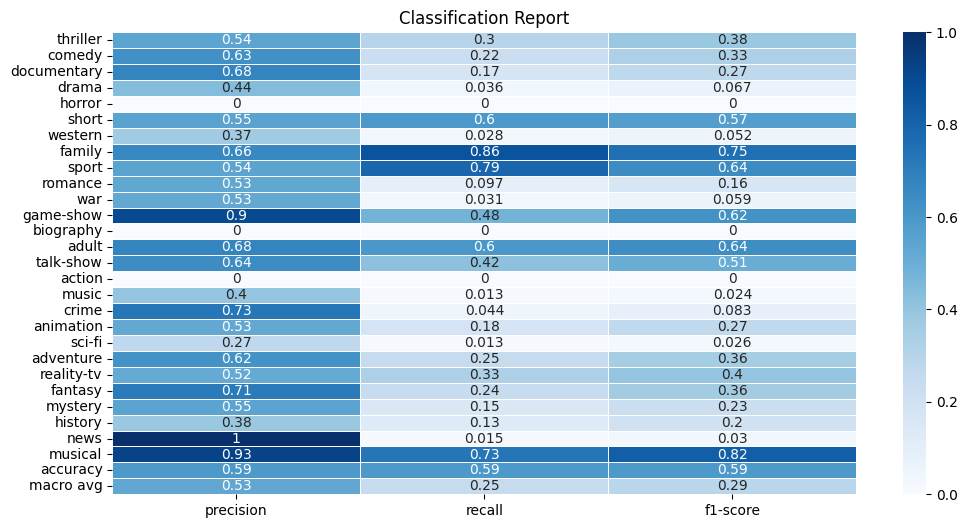

In [37]:
print("-------------------------------------Naive Baise------------------------------------------------------")
print("---The Result after training on the training dataset and testing it on the testing dataset------------")
print("------------------------------------------------------------------------------------------------------")
# Calculate accuracy
accuracy = accuracy_score(Y_testing['GENRE'], Y_testing['GENRE_Pred_logistic_reg'])
genre_names = Y_testing['GENRE'].unique()
# Generate a classification report
report = classification_report(Y_testing['GENRE'], Y_testing['GENRE_Pred_logistic_reg'], target_names=genre_names, output_dict=True,zero_division=0)
# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()
# Plot the accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x=['Accuracy'], y=[accuracy], palette="Blues")
plt.title("Accuracy")
plt.ylim(0, 1.0)  # Set the y-axis limit to match the accuracy scale
plt.show()

# Plot the classification report
plt.figure(figsize=(12, 6))
sns.heatmap(report_df.iloc[:-1, :3], annot=True, cmap="Blues", linewidths=.5)
plt.title("Classification Report")
plt.show()


-------------------------------------Logistic Regression----------------------------------------------
--The Result after training on the oversampled training dataset and testing it on the testing dataset-
------------------------------------------------------------------------------------------------------


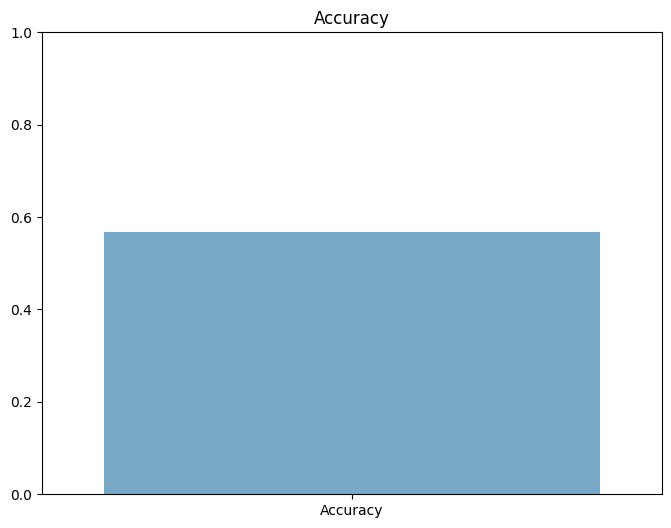

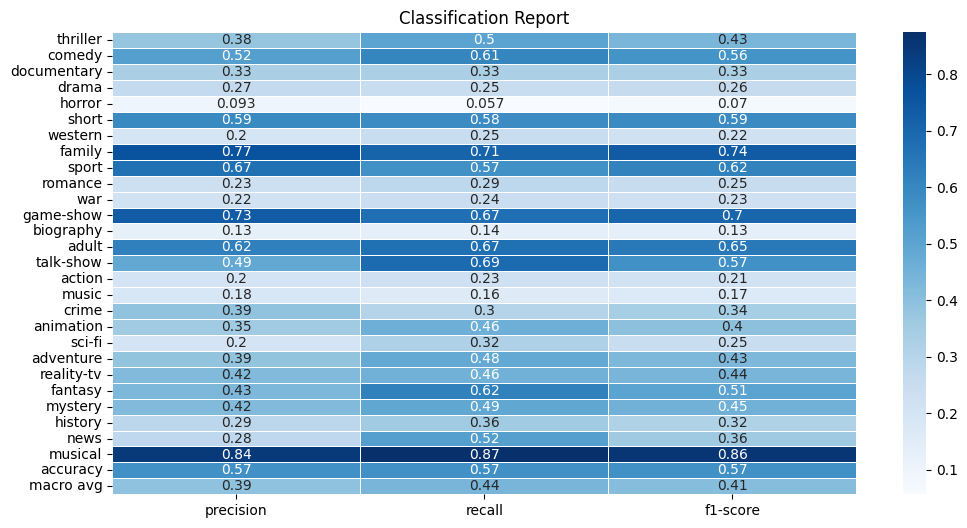

In [38]:
print("-------------------------------------Logistic Regression----------------------------------------------")
print("--The Result after training on the oversampled training dataset and testing it on the testing dataset-")
print("------------------------------------------------------------------------------------------------------")
# Calculate accuracy
accuracy = accuracy_score(Y_testing['GENRE'], Y_testing['GENRE_Pred_logistic_reg_oversampled'])
genre_names = Y_testing['GENRE'].unique()
# Generate a classification report
report = classification_report(Y_testing['GENRE'], Y_testing['GENRE_Pred_logistic_reg_oversampled'], target_names=genre_names, output_dict=True,zero_division=0)
# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()
# Plot the accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x=['Accuracy'], y=[accuracy], palette="Blues")
plt.title("Accuracy")
plt.ylim(0, 1.0)  # Set the y-axis limit to match the accuracy scale
plt.show()

# Plot the classification report
plt.figure(figsize=(12, 6))
sns.heatmap(report_df.iloc[:-1, :3], annot=True, cmap="Blues", linewidths=.5)
plt.title("Classification Report")
plt.show()


-------------------------------------Logistic Regression----------------------------------------------
-The Result after training on the UnderSampled training dataset and testing it on the testing dataset-
------------------------------------------------------------------------------------------------------


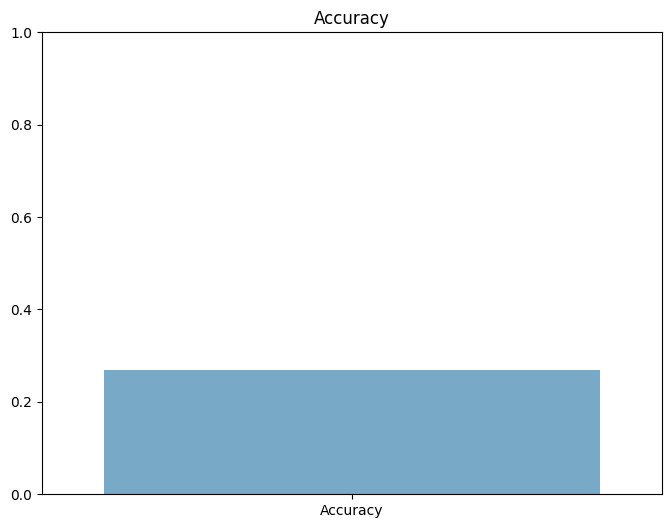

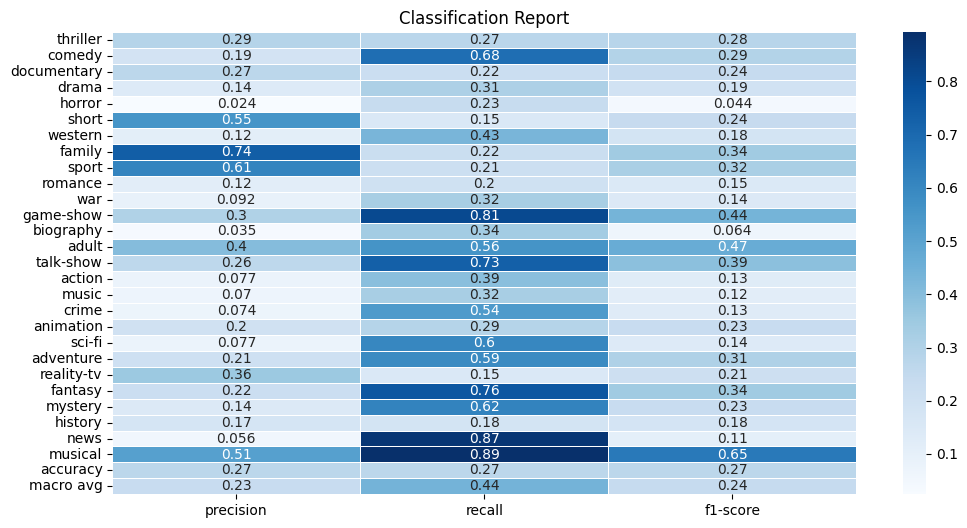

In [39]:
print("-------------------------------------Logistic Regression----------------------------------------------")
print("-The Result after training on the UnderSampled training dataset and testing it on the testing dataset-")
print("------------------------------------------------------------------------------------------------------")
# Calculate accuracy
accuracy = accuracy_score(Y_testing['GENRE'], Y_testing['GENRE_Pred_logistic_reg_undersampled'])
genre_names = Y_testing['GENRE'].unique()
# Generate a classification report
report = classification_report(Y_testing['GENRE'], Y_testing['GENRE_Pred_logistic_reg_undersampled'], target_names=genre_names, output_dict=True,zero_division=0)
# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()
# Plot the accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x=['Accuracy'], y=[accuracy], palette="Blues")
plt.title("Accuracy")
plt.ylim(0, 1.0)  # Set the y-axis limit to match the accuracy scale
plt.show()

# Plot the classification report
plt.figure(figsize=(12, 6))
sns.heatmap(report_df.iloc[:-1, :3], annot=True, cmap="Blues", linewidths=.5)
plt.title("Classification Report")
plt.show()


# Conclusion

After experimenting with the multiple technique and using different approaches for the data preprocessing, I conclude that the dataset is baised and I try to remove this baiseness by doing some preprocessing on the training data and I have trained the model on the both oversampled and undersampled dataset. After the trainig I conclude that the naive baise perform good when I oversample the minority class, using techniques like Synthetic Minority Over-sampling Technique (SMOTE), with the good accuracy and classification report. But, after the experimentation I have acheived the accuracy of 59.431 using the logistic regression without doing any oversampling and undersampling. But, this cause the low recall and f1 score. After experimenting the logistic regression on the oversampled data i have got an accuracy of 57 with the recall and f1 score increases but precision decrease.